# Homework 3

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

## Question 1

Writing a function that draws `n` rectangles with random width and heights inside an image.

1. Let's start by creating a function that would randomly generate 4 coordinates [r1,c1,r2,c2] with:

    - r1 < r2 < h
    - c1 < c2 < w

In [209]:
def generateBoxes(image, n):
    h, w, ch = image.shape
    cols = 4
    rows = n
    boxes = np.zeros((rows,cols), dtype = int)

    for i in range(n):
        r1 = np.random.randint(0,h-1)
        r2 = np.random.randint(r1,h-1)
        c1 = np.random.randint(0,w-1)
        c2 = np.random.randint(c1,w-1)

        boxes[i] = [r1, c1, r2, c2]
    
    return boxes

2. Now that we have the coordinates of the boxes, we can use them to draw the rectangles.

In [210]:
def drawBoxes(image, coordinates):
    fig, imgplt = plt.subplots(1,1, figsize=(5,5))
    imgplt.imshow(image)

    for i in range(coordinates.shape[0]):
        r1, c1, r2, c2 = coordinates[i]
        imgplt.plot([r1, r1, r2, r2, r1],
                    [c1, c2, c2, c1, c1],
                    color='red', 
                    linewidth=2)
        # (r1,c1) is repeated to close the box
    
    imgplt.axis('off')
    plt.tight_layout()
    plt.show()

3. We are done, but lets just write a function to display the points nicer :)

In [211]:
def displayPoints(arr, image):
    h, w, ch = image.shape
    print(f'Image width: {w}, Image height: {h}\n')

    for i in range(len(arr)):
        r1, c1, r2, c2 = arr[i]
        print(f'Box {i+1}: [r1:{r1}, c1:{c1}, r2:{r2}, c2:{c2}]')

4. Lets test on Carnegie.

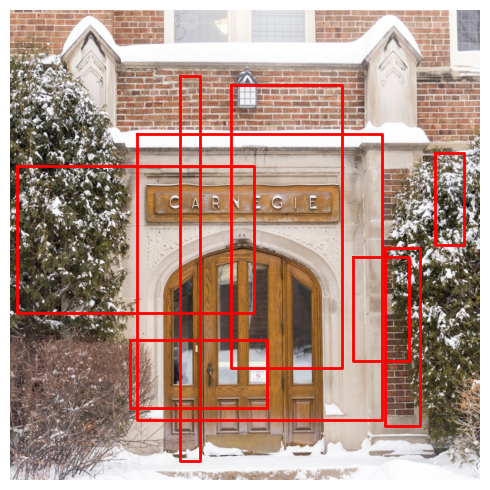

Image width: 800, Image height: 800

Box 1: [r1:584, c1:420, r2:678, c2:597]
Box 2: [r1:638, c1:405, r2:697, c2:708]
Box 3: [r1:289, c1:112, r2:323, c2:767]
Box 4: [r1:11, c1:265, r2:414, c2:515]
Box 5: [r1:216, c1:210, r2:632, c2:698]
Box 6: [r1:376, c1:127, r2:564, c2:609]
Box 7: [r1:204, c1:562, r2:437, c2:677]
Box 8: [r1:723, c1:243, r2:772, c2:400]


In [217]:
image = io.imread("../../Data/main/img-samples/carnegie.jpg")
n = 8

points = generateBoxes(image, n)
drawBoxes(image, points)

displayPoints(points, image)

## Question 2

Drawing a rectangle with painting the pixels of an image red, using 2 points.

In [213]:
def drawRectangle(image, r1, c1, r2, c2):
    img = image.copy() # so the image doesn't get modified

    h,w,ch = image.shape

    if r1 < 0 or r2 >= h-1 or c1 < 0 or c2 >= w-1:
        print("Error: Coordinates are out of bounds for this image")
        print(f"Image width: {w}, Image height: {h}")
        return img
    if r1 > r2 or c1 > c2:
        print("Error: The first coordinate must be smaller than the second")
        return img
    if r1 == r2 or c1 == c2:
        print("Warning: These coordinates form a line")

    thickness = 4 # 1 pixel was barely visible

    img[r1:r1 + thickness, c1:c2] = [255, 0, 0]
    img[r2 - thickness:r2, c1:c2] = [255, 0, 0]
    img[r1:r2, c1:c1 + thickness] = [255, 0, 0]
    img[r1:r2, c2 - thickness:c2] = [255, 0, 0]

    print(f"Rectangle drawn at coordinates: ({r1},{c1})x({r2},{c2})")
    return img

Rectangle drawn at coordinates: (300,200)x(400,600)


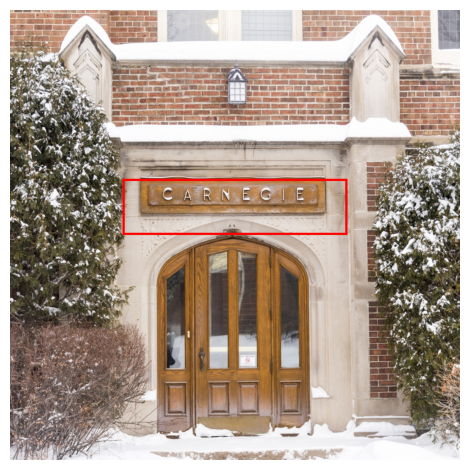

In [214]:
image = io.imread("../../Data/main/img-samples/carnegie.jpg")
r1, c1, r2, c2 = 300, 200, 400, 600
imgplot = drawRectangle(image, r1, c1, r2, c2)
plt.imshow(imgplot)
plt.axis('off')
plt.tight_layout()
plt.show()